# 主題實作 價量關係

- 請分析價格區間與成交量的關係


參考資料
- https://school.gugu.fund/blog/gugu_knowledge/5862257991

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
spy = pd.read_csv("data/spy_volume.csv", index_col="Date", parse_dates=["Date"])
spy

Close        High         Low    Volume
Date                                                    
1993-01-29   24.763752   24.781365   24.658075   1003200
1993-02-01   24.939859   24.939859   24.781343    480500
1993-02-02   24.992710   25.010323   24.869420    201300
1993-02-03   25.256895   25.274508   25.010314    529400
1993-02-04   25.362566   25.415405   25.063147    531500
...                ...         ...         ...       ...
2024-06-10  535.659973  535.989990  532.570007  35729300
2024-06-11  536.950012  537.010010  532.049988  36383400
2024-06-12  541.359985  544.119995  540.299988  63251300
2024-06-13  542.450012  543.330017  539.590027  44760900
2024-06-14  542.780029  542.809998  539.849976  40032000

[7901 rows x 4 columns]

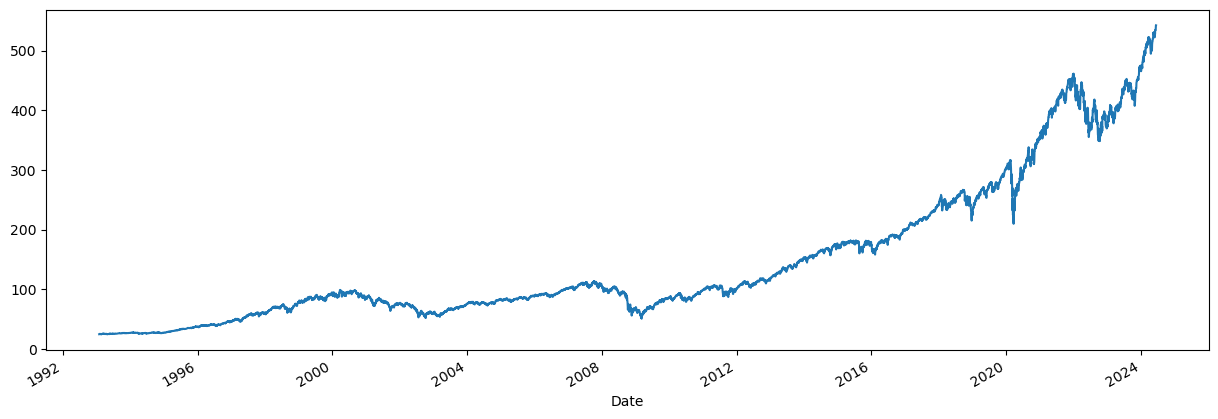

In [4]:
spy.Close.plot(figsize=(15, 5))
plt.show()

# 解答

In [5]:
spy["range"] = spy.High - spy.Low

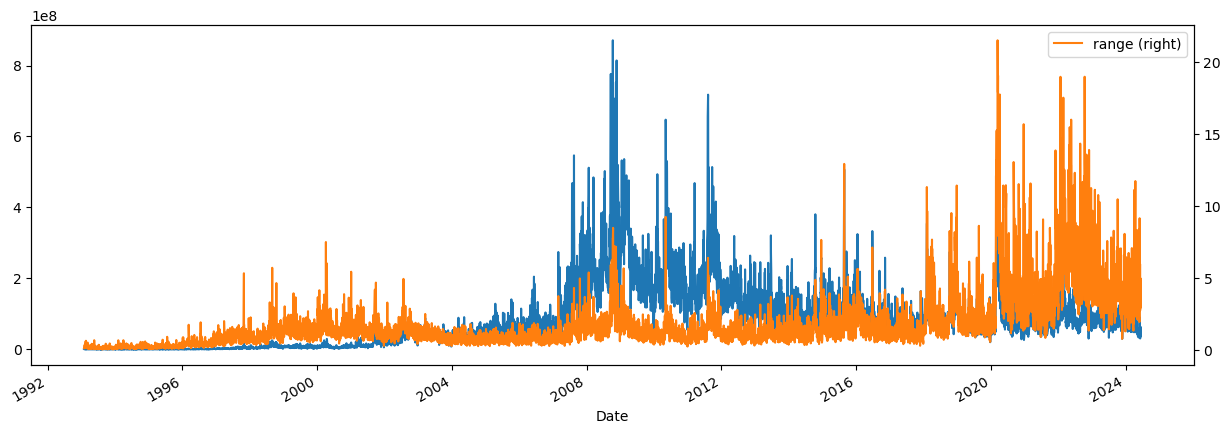

In [6]:
spy.Volume.plot(figsize=(15, 5), label="volume")
spy.range.plot(secondary_y=True)
plt.legend()
plt.show()

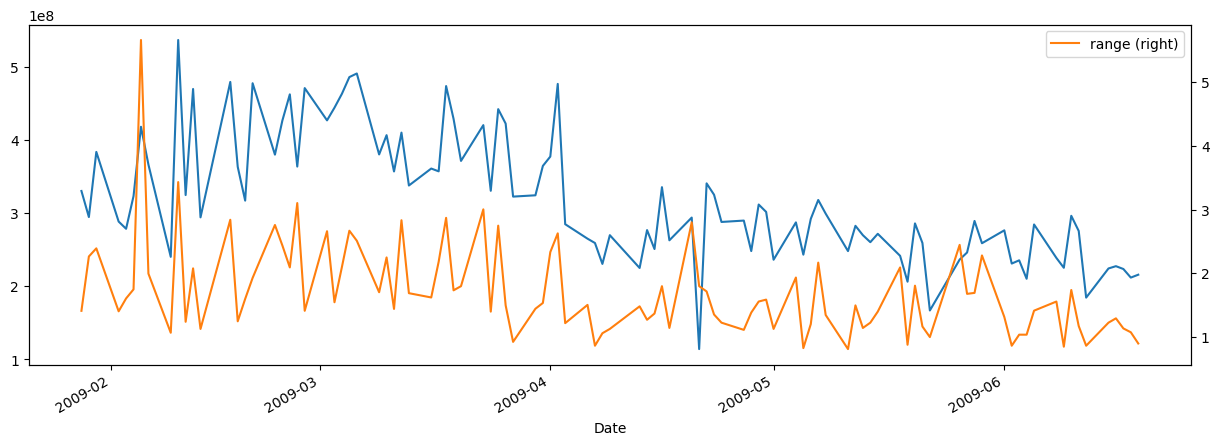

In [9]:
length = 100
offset = np.random.randint(0, high=len(spy)-length)
spy.iloc[offset:offset+length].Volume.plot(figsize=(15, 5), label="volume")
spy.iloc[offset:offset+length].range.plot(secondary_y=True)
plt.legend()
plt.show()

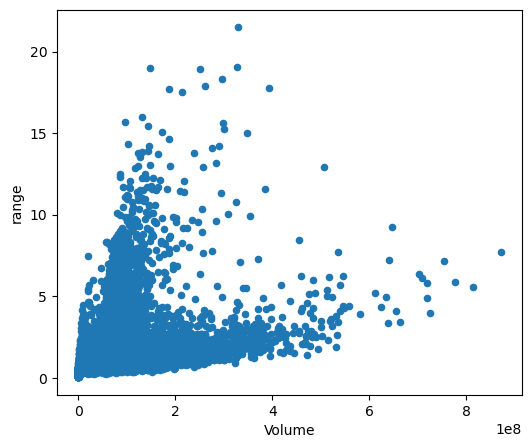

In [10]:
spy.plot.scatter(figsize=(6, 5), x="Volume", y="range")
plt.show()

In [11]:
print("Correlation")
spy[["Volume", "range"]].corr()

Correlation


Volume    range
Volume  1.00000  0.31762
range   0.31762  1.00000

## 進一步分析兩個線性關係

In [12]:
cut_date = "2018-01-01"

In [13]:
before = spy[spy.index <= cut_date]
after = spy[spy.index > cut_date]

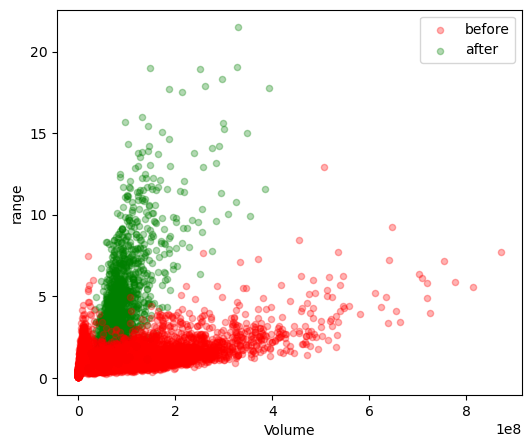

In [14]:
ax = before.plot.scatter(figsize=(6, 5), x="Volume", y="range", c="r", alpha=.3, zorder=5, label="before")
after.plot.scatter(ax=ax, x="Volume", y="range", c="g", alpha=.3, label="after")
plt.show()

In [15]:
before[["Volume", "range"]].corr()

Volume     range
Volume  1.000000  0.590879
range   0.590879  1.000000

In [16]:
after[["Volume", "range"]].corr()

Volume     range
Volume  1.000000  0.704551
range   0.704551  1.000000